In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("./OnlineRetail.csv",encoding='unicode_escape')
df.head()

In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #chuyển InvoiceDate thành datetime object
d1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] #lấy các cột dữ liệu cần thiết
d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
d1 = d1.set_index(['InvoiceDate']) #chuyển mỗi giá trị InvoiceDate thành index của mỗi để search theo index
d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.month).sum() #tính tổng doanh thu theo tháng

d4 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') # xóa bỏ các dòng trùng lặp của cùng một đơn hàng
d4 = d4['2011']
d4 = d4.reset_index()
d5 = d4.groupby(by=d4['InvoiceDate'].dt.month).count() #đếm tổng số đơn hàng trong tháng

C:\Users\Cao\AppData\Local\Temp\ipykernel_14688\1163318531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['Revenue'] = d1['Quantity'] * d1['UnitPrice'] #tính doanh thu trên mỗi row
C:\Users\Cao\AppData\Local\Temp\ipykernel_14688\1163318531.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011'] #lọc những hàng mà index có chứa '2011'
C:\Users\Cao\AppData\Local\Temp\ipykernel_14688\1163318531.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a f

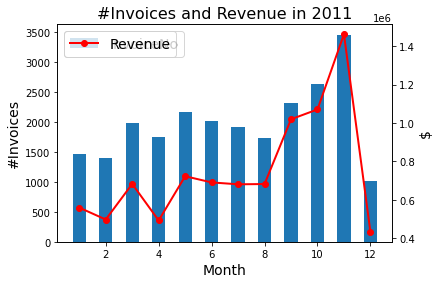

In [6]:
x = d5.index.get_level_values(0)
plt.bar(x, d5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, d3['Revenue'], label = 'Revenue', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Month', fontsize = 14)
axes1.set_ylabel('#Invoices', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title('#Invoices and Revenue in 2011', fontsize = 16)
plt.show()

In [6]:

d21 = d[(d['Place'] == 'National Average') & (d['Year'] == 2016) & (d['ProductName'] == 'Milk (powder, infant formula) - Retail')]
d22 = d[(d['Place'] == 'National Average') & (d['Year'] == 2016) & (d['ProductName'] == 'Fuel (gas) - Retail')]
d23 = d[(d['Place'] == 'National Average') & (d['Year'] == 2018) & (d['ProductName'] == 'Milk (powder, infant formula) - Retail')]
d24 = d[(d['Place'] == 'National Average') & (d['Year'] == 2018) & (d['ProductName'] == 'Fuel (gas) - Retail')]
d25 = d[(d['Place'] == 'National Average') & (d['Year'] == 2019) & (d['ProductName'] == 'Milk (powder, infant formula) - Retail')]
d26 = d[(d['Place'] == 'National Average') & (d['Year'] == 2019) & (d['ProductName'] == 'Fuel (gas) - Retail')]

d31 = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Fuel (gas) - Retail') & (d['Year'] == 2016)]
d32 = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Milk (powder, infant formula) - Retail') & (d['Year'] == 2016)]
d33 = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Fuel (gas) - Retail') & (d['Year'] == 2018)]
d34 = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Milk (powder, infant formula) - Retail') & (d['Year'] == 2018)]
d35 = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Fuel (gas) - Retail') & (d['Year'] == 2019)]
d36 = d[(d['Place'] == 'National Average') & (d['ProductName'] == 'Milk (powder, infant formula) - Retail') & (d['Year'] == 2019)]

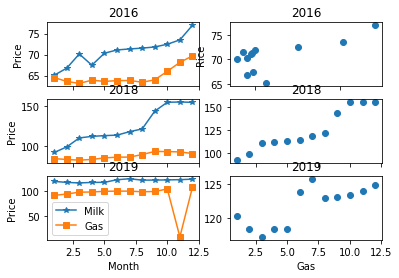

In [8]:
fig, ax = plt.subplots(3, 2)
ax[0][0].plot(d21['Month'], d21['Price'], marker = '*', label = 'Milk-2016')
ax[0][0].plot(d22['Month'], d22['Price'], marker = 's', label = 'Gas-2016')
ax[0][0].set_ylabel('Price')
ax[0][0].set_xticklabels([])
ax[0][0].set_title('2016')

ax[1][0].plot(d23['Month'], d23['Price'], marker = '*', label = 'Milk-2018')
ax[1][0].plot(d24['Month'], d24['Price'], marker = 's', label = 'Gas-2018')
ax[1][0].set_ylabel('Price')
ax[1][0].set_xticklabels([])
ax[1][0].set_title('2018')

ax[2][0].plot(d25['Month'], d25['Price'], marker = '*', label = 'Milk')
ax[2][0].plot(d26['Month'], d26['Price'], marker = 's', label = 'Gas')
ax[2][0].set_ylabel('Price')
ax[2][0].set_xlabel('Month')
ax[2][0].legend()
ax[2][0].set_title('2019')

ax[0][1].scatter(d31['Price'], d32['Price'])
ax[0][1].set_title('2016')
ax[0][1].set_ylabel('Rice')
ax[0][1].set_xticklabels([])

ax[1][1].scatter(d33['Month'], d34['Price'])
ax[1][1].set_title('2018')
ax[1][1].set_xticklabels([])

ax[2][1].scatter(d35['Month'], d36['Price'])
ax[2][1].set_title('2019')
ax[2][1].set_xlabel('Gas')
plt.show()